JaeYoen Park 50194193

MTH 448

Due: 2023/02/26

# Recognizing digits with K-NN

## Introduction

Will it be possible for handwritten digits recognized by computer?


MNIST database is stand for Modified National Institute of Standards and Technology database which contains handwritten digits that the large amount of digits are stored by 28x28 image pixels with labels. It is commonly used to train the computer to image process.


In order to train the data and predict the label, K-NN (K- nearest neighbors) algorithm will be used which commonly used to solve classification and regression problems.

The main idea of using K-NN is storing the training data into cluster-like coordinates and predict the certain data by finding closest training data(also called as neighbors) with Euclidean distance method.






From our project, we will explore 60,000 digits data separating in two two parts as training data and testing data.
Our main goal is to explore the factors that increases the accuracy of prediction and find the common errors made from different settings.


## Prepare data and library

This project will mainly use Numpy, Scikit learn, matplot, and seaborn.

In [1]:
from pathlib import Path
import requests
import numpy as np
import gzip
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Importing the MNIST datas
mnist_url = "http://yann.lecun.com/exdb/mnist/"
img_file = "train-images-idx3-ubyte.gz"
labels_file = "train-labels-idx1-ubyte.gz"

for fname in [img_file, labels_file]:
    if Path(fname).is_file() :
        print(f"Found: {fname}")
        continue
    print(f"Downloading: {fname}")
    r = requests.get(mnist_url + fname)
    with open(fname, 'wb') as foo:
        foo.write(r.content)

Found: train-images-idx3-ubyte.gz
Found: train-labels-idx1-ubyte.gz


In [3]:
with gzip.open(img_file, 'rb') as foo: # reading images
     f = foo.read()

Manipulate the data to match the image with the label.

In [4]:
images = np.array([b for b in f[16:]]).reshape(-1, 28*28) # manipulating shape and ordering to divide by each digit.

In [5]:
with gzip.open("train-labels-idx1-ubyte.gz", 'rb') as foo: # reading labels
    f = foo.read()

In [6]:
labels = np.array([b for b in f[8:]]) # ordering to match with manipulated image

Check the total amount of data match each other.

In [7]:
images.shape 

(60000, 784)

In [8]:
labels.shape

(60000,)

## K-NN

As defined in introduction, K-NN stands for K- Nearest Neighbors. K-NN is an algorithm that is a non- parametric, supervised learning classifier. K-NN use Euclidean distance 
$$d({\bf v},{\bf w}) = \sqrt{\sum_{i=1}^n (v_i -w_i)^2}$$


between training data and testing data. While the training data exist in a plot, inserting one test data will compare the number of neighbor data to predict the test data. 
Finally, a function that classifies the data through K-NN algorithm is called `knn_classifier`.



Define a `knn_classifier` function that takes training data, training labels, testing data, and number of neighbors as input.

function includes the calculation of Euclidean distance between training data with testing data by number of neighbors and return the mode label from neighbors with corresponding neighbors data.

In [9]:
def knn_classifier(training_data,training_labels, x, n):
    
    dist_bet_x = np.linalg.norm(x-training_data, axis=1) # Euclidean distance between x and training data.
    close_to_far = np.argsort(dist_bet_x) # argsorting the distance
    neighbors = close_to_far[0:n] # collecting n number of neighbors excluding x itself.
    label = training_labels[neighbors] #label of neighbors
    return (st.mode(label), neighbors) #return mode of labels, neighbor indexes

Below is the test run of `knn_classifier` function.

In [10]:
knn_classifier(images[:50000,:],labels[:50000],images[50001,:], 5)

(ModeResult(mode=array([8]), count=array([5])),
 array([23650,  9726,   144, 48160, 10663]))

In [11]:
knn_classifier(images[:50000,:],labels[:50000],images[50001,:], 5)[0][0][0] #return only mode value

8

## What feature will lead high accuracy?

Now we have a classifier function, we can select our range for each training data and testing data.

While there are varieties of factors that could differ the accuracy of `knn_classifier`, we will explore several factors such as difference amount of training/testing data, number of neighbors to compare in order to find highest accuracy rate.

Since training data must be larger than testing data in order to retrieve decent accuracy rate, We will test the training/testing data as the following
* 80% / 20%
* 90% / 10%

Then, we will differ the number of neighbors to find the higher accuracy rate as following:
* 5 neighbors
* 10 neighbors.

Total of 4 test will be done by mix matching the two factors above.





## Confusion Matrix

A visual aid is needed to list the analyzed results in an easy-to-understand manner. 
In the process, we can easily check using the confusion matrix.
Confusion matrices are often used in machine learning or statistical classification and are sometimes referred to as error matrices.
This method is suitable for supervised learning because it is a classified graph based on true label data and predicted label data.
We will be using confusion matrix provided by Seaborn library.

### Condition 1: 80% training, 20% testing, 5 neighbors

In [12]:
predicted_label=np.zeros(12000, dtype=int) # predicted label array of zeros
real_label =np.zeros(12000, dtype=int) # real label array of zeros
trained_data = images[:48000,:]
trained_label = labels[:48000]

for t in range(12000): # running range of 20% of total number of data
    
    # classifying the predicted labels by comparing the front 47999 data to 48000~59999.
    predicted_label[t] = knn_classifier(trained_data,trained_label,images[48000+t,:], 5)[0][0][0]
    # real label 
    real_label[t] = labels[48000+t]

predicted_label,real_label

(array([4, 7, 8, ..., 5, 6, 8]), array([4, 7, 8, ..., 5, 6, 8]))

In [13]:
y_true= real_label # Array of real labels
y_pred= predicted_label # Array of predicted labels
c =confusion_matrix(y_true, y_pred) # Confusion matrix

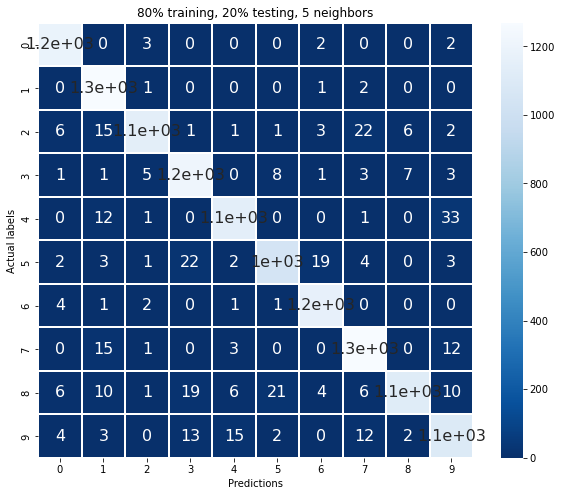

In [14]:
# Visualize confusion matrix as heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(c, 
            annot=True,
            annot_kws = {"fontsize": 16},
            cbar=True,
            linewidth=2,
            square=True,
            cmap="Blues_r"
            
)
plt.title("80% training, 20% testing, 5 neighbors")

plt.xlabel("Predictions")
plt.ylabel("Actual labels")
plt.show()

### Condition 1 accuracy

In [15]:
accuracy = (c[0,0]+c[1,1]+c[2,2]+c[3,3]+c[4,4]+c[5,5]+c[6,6]+c[7,7]+c[8,8]+c[9,9])/12000 * 100 # matched label / total
accuracy

96.88333333333333

### Condition 2: 90% training, 10% testing, 5 neighbors

In [16]:
predicted_label=np.zeros(6000, dtype=int) # predicted label array of zeros
real_label =np.zeros(6000, dtype=int) # real label array of zeros
trained_data = images[:54000,:]
trained_label = labels[:54000]

for t in range(6000): # running range of 20% of total number of data
    
    # classifying the predicted labels by comparing the front 47999 data to 48000~59999.
    predicted_label[t] = knn_classifier(trained_data,trained_label,images[54000+t,:], 5)[0][0][0]
    # real label 
    real_label[t] = labels[54000+t]

predicted_label,real_label

(array([5, 3, 5, ..., 5, 6, 8]), array([5, 3, 5, ..., 5, 6, 8]))

In [17]:
y_true= real_label # Array of real labels
y_pred= predicted_label # Array of predicted labels
c =confusion_matrix(y_true, y_pred) # Confusion matrix

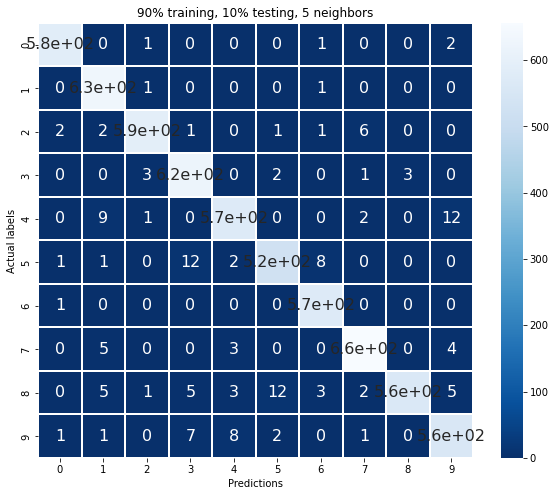

In [18]:
# Visualize confusion matrix as heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(c, 
            annot=True,
            annot_kws = {"fontsize": 16},
            cbar=True,
            linewidth=2,
            square=True,
            cmap="Blues_r"
            
)
plt.title("90% training, 10% testing, 5 neighbors")

plt.xlabel("Predictions")
plt.ylabel("Actual labels")
plt.show()

### Condition 2 accuracy

In [19]:
accuracy = (c[0,0]+c[1,1]+c[2,2]+c[3,3]+c[4,4]+c[5,5]+c[6,6]+c[7,7]+c[8,8]+c[9,9])/ 6000 * 100 # matched label / total
accuracy

97.58333333333333

### Condition 3: 80% training, 20% testing, 10 neighbors

In [20]:
predicted_label=np.zeros(12000, dtype=int) # predicted label array of zeros
real_label =np.zeros(12000, dtype=int) # real label array of zeros
trained_data = images[:48000,:]
trained_label = labels[:48000]

for t in range(12000): # running range of 20% of total number of data
    
    # classifying the predicted labels by comparing the front 47999 data to 48000~59999.
    predicted_label[t] = knn_classifier(trained_data,trained_label,images[48000+t,:], 10)[0][0][0]
    # real label 
    real_label[t] = labels[48000+t]

predicted_label,real_label

(array([4, 7, 8, ..., 5, 6, 8]), array([4, 7, 8, ..., 5, 6, 8]))

In [21]:
y_true= real_label # Array of real labels
y_pred= predicted_label # Array of predicted labels
c =confusion_matrix(y_true, y_pred) # Confusion matrix

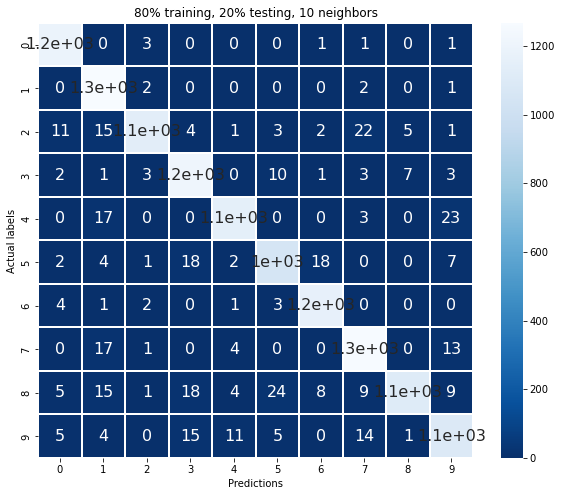

In [22]:
# Visualize confusion matrix as heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(c, 
            annot=True,
            annot_kws = {"fontsize": 16},
            cbar=True,
            linewidth=2,
            square=True,
            cmap="Blues_r"
            
)
plt.title("80% training, 20% testing, 10 neighbors")

plt.xlabel("Predictions")
plt.ylabel("Actual labels")
plt.show()

### Condition 3 accuracy

In [23]:
accuracy = (c[0,0]+c[1,1]+c[2,2]+c[3,3]+c[4,4]+c[5,5]+c[6,6]+c[7,7]+c[8,8]+c[9,9])/ 12000 * 100 # matched label / total
accuracy

96.71666666666667

### Condition 4: 90% training, 10% testing, 10 neighbors

In [24]:
predicted_label=np.zeros(6000, dtype=int) # predicted label array of zeros
real_label =np.zeros(6000, dtype=int) # real label array of zeros
trained_data = images[:54000,:]
trained_label = labels[:54000]

for t in range(6000): # running range of 20% of total number of data
    
    # classifying the predicted labels by comparing the front 47999 data to 48000~59999.
    predicted_label[t] = knn_classifier(trained_data,trained_label,images[54000+t,:], 10)[0][0][0]
    # real label 
    real_label[t] = labels[54000+t]

predicted_label,real_label

(array([5, 3, 5, ..., 5, 6, 8]), array([5, 3, 5, ..., 5, 6, 8]))

In [25]:
y_true= real_label # Array of real labels
y_pred= predicted_label # Array of predicted labels
c =confusion_matrix(y_true, y_pred) # Confusion matrix

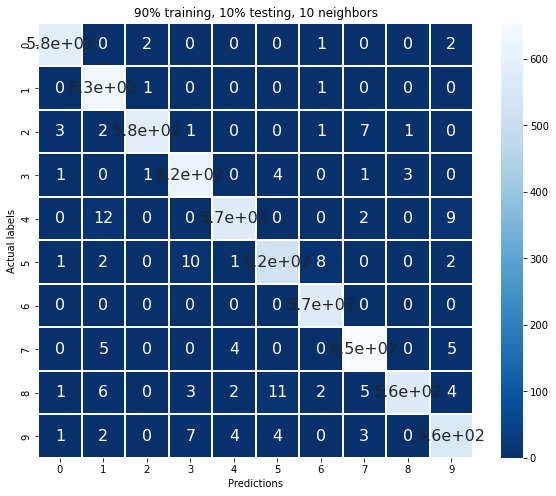

In [26]:
# Visualize confusion matrix as heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(c, 
            annot=True,
            annot_kws = {"fontsize": 16},
            cbar=True,
            linewidth=2,
            square=True,
            cmap="Blues_r"
            
)
plt.title("90% training, 10% testing, 10 neighbors")
plt.xlabel("Predictions")
plt.ylabel("Actual labels")
plt.show()

### Condition 4 accuracy

In [27]:
accuracy = (c[0,0]+c[1,1]+c[2,2]+c[3,3]+c[4,4]+c[5,5]+c[6,6]+c[7,7]+c[8,8]+c[9,9])/ 6000 * 100 # matched label / total
accuracy

97.53333333333333

## Analysis result and possible considerations 

According to 4 test we went through, accuracy with condition (90% training, 10% testing, 5 neighbors) has the highest accuracy. This conclude the bigger amount of training affect the most in accuracy rate. Though there is a possibility of more higher accuracy by weighting different according to the distance of neighbors. Just increasing the neighbors would decrease the accuracy by accepting the further distance which they don't match to prediction data.

Meanwhile even the highest accuracy rate did not reach 100%. Analyzing the confusion matrix from each, there were common errors that the computer miss as following:

1. actual digit 4 predicted as 9
2. actual digit 2 predicted as 7
3. actual digit 5 predicted as 3
4. actual digit 8 predicted as 5

Considering the misses computer made, they are fairly understandable since they look alike by line connection error and this type misinterpret also occurs to human.

## Conclusion

In order to make computers recognize the handwritten numbers, K-NN algorithms are one of the simple method to let computer predict. In this process, inserting big amount of training data are necessary. By clustering the coordinates and predict by the distance between neighbor coordinates make this method possible. Though the accuracy can differ by several conditions. We have tested 4 different conditions to explore the most effective condition in order to increase the accuracy of prediction. The highest accuracy result we got was about 97.58%. Meanwhile, it is likely to be impossible to raise up until 100% because the errors we found were the digits that are alike. Those digits have relations which one line connection miss can occur to define different digit. Considering those misinterpret often occurs to human, 97.58% is likely to be understandable result. 

## Source

http://yann.lecun.com/exdb/mnist/

https://en.wikipedia.org/wiki/MNIST_database#:~:text=The%20MNIST%20database%20(Modified%20National,the%20field%20of%20machine%20learning.

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

https://www.ibm.com/topics/knn#:~:text=Next%20steps-,K%2DNearest%20Neighbors%20Algorithm,of%20an%20individual%20data%20point.

https://en.wikipedia.org/wiki/Confusion_matrix

In [ ]:
\